In [1]:
for i in range(1,7):
    print(i/6)

0.16666666666666666
0.3333333333333333
0.5
0.6666666666666666
0.8333333333333334
1.0


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import statsmodels.api as sm

from utils import (
    process_qualtrics,
    calculate_scores,
    split_control,
)

In [4]:
pd.set_option('display.max_columns', None)


In [5]:
data_file = "SHS-cues_May+4,+2025_07.02.tsv"
data_folder = "data"
data_path = os.path.join(data_folder, data_file)

In [6]:
MIN_DURATION = 0 # min duration (minutes) for a session to be included

Load the data

In [7]:
df_qualtrics = pd.read_csv(data_path, sep='\t', encoding='utf-16')
df_qualtrics.head(6)

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Q33,Age_1,Gender,Nationality,q_d_01,q_d_02,q_d_10,q_d_11,q_v_02,q_d_16,q_v_10,q_v_09,q_d_15,q_d_12,Q22,Q35,Q37,d_08,d_09,d_13,d_14,v_01,v_04,v_07,v_07.1,v_12,v_15,randomized_score,FL_86_DO,FL_88_DO,FL_87_DO,FL_96_DO
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,Recipient First Name,Recipient Email,External Data Reference,Location Latitude,Location Longitude,Distribution Channel,User Language,do you consent ?,Quelle est votre âge ? - age,Avec quel genre vous identifiez-vous ?,Quel est votre pays d'origine ?,Cette personne dit-elle la vérité ?,Cette personne dit-elle la vérité ?,Cette personne dit-elle la vérité ?,Cette personne dit-elle la vérité ?,Cette personne dit-elle la vérité ?,Cette personne dit-elle la vérité ?,Cette personne dit-elle la vérité ?,Cette personne dit-elle la vérité ?,Cette personne dit-elle la vérité ?,Cette personne dit-elle la vérité ?,Quels indices avez-vous utilisés pour évaluer ...,Cette personne dit-elle la vérité ?,Cette personne dit-elle la vérité ?,Cette personne dit-elle la vérité ?,Cette personne dit-elle la vérité ?,Cette personne dit-elle la vérité ?,Cette personne dit-elle la vérité ?,Cette personne dit-elle la vérité ?,Cette personne dit-elle la vérité ?,Cette personne dit-elle la vérité ?,Cette personne dit-elle la vérité ?,Cette personne dit-elle la vérité ?,Cette personne dit-elle la vérité ?,randomized_score,FL_86 - Block Randomizer - Display Order,FL_88 - Block Randomizer - Display Order,FL_87 - Block Randomizer - Display Order,FL_96 - Block Randomizer - Display Order
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}","{""ImportId"":""recipientFirstName""}","{""ImportId"":""recipientEmail""}","{""ImportId"":""externalDataReference""}","{""ImportId"":""locationLatitude""}","{""ImportId"":""locationLongitude""}","{""ImportId"":""distributionChannel""}","{""ImportId"":""userLanguage""}","{""ImportId"":""QID49""}","{""ImportId"":""QID1_1""}","{""ImportId"":""QID4""}","{""ImportId"":""QID8""}","{""ImportId"":""QID68""}","{""ImportId"":""QID57""}","{""ImportId"":""QID71""}","{""ImportId"":""QID75""}","{""ImportId"":""QID97""}","{""ImportId"":""QID93""}","{""ImportId"":""QID100""}","{""ImportId"":""QID99""}","{""ImportId"":""QID85""}","{""ImportId"":""QID81""}","{""ImportId"":""QID28""}","{""ImportId"":""QID61""}","{""ImportId"":""QID64""}","{""ImportId"":""QID66""}","{""ImportId"":""QID70""}","{""ImportId"":""QID77""}","{""ImportId"":""QID79""}","{""ImportId"":""QID94""}","{""ImportId"":""QID95""}","{""ImportId"":""QID96""}","{""ImportId"":""QID92""}","{""ImportId"":""QID91""}","{""ImportId"":""QID90""}","{""ImportId"":""randomized_score""}","{""ImportId"":""FL_86_DO""}","{""ImportId"":""FL_88_DO""}","{""ImportId"":""FL_87_DO""}","{""ImportId"":""FL_96_DO""}"
2,2025-02-19 09:07:51,2025-02-19 09:07:58,Survey Preview,NaN,100,6,True,2025-02-19 09:07:58,R_8KL0qysaLXYZTuV,NaN,NaN,NaN,NaN,46.5163,6.5802,preview,EN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-03-05 09:20:57,2025-03-05 09:23:51,Survey Preview,NaN,100,173,True,2025-03-05 09:23:52,R_8F5alRe54Zjg1QA,NaN,NaN,NaN,NaN,46.5415,6.5414,preview,EN,"Oui, j'accepte",24,Homme,Slovakia,NaN,NaN,Oui,Oui,Oui,NaN,NaN,NaN,NaN,NaN,Enchâssement (recours excessif aux détails),NaN,NaN,NaN,NaN,NaN,Non,NaN,NaN

In [8]:
tmp = df_qualtrics[2:]['Progress'].value_counts().reset_index()
tmp.Progress = tmp.Progress.astype(int)
tmp.sort_values('Progress', inplace=True)
tmp.set_index('Progress' , inplace=True)
tmp

,count
Progress,
2,18
4,9
36,33
40,10
43,4
47,2
87,7
91,1
100,76


In [9]:
df = process_qualtrics(df_qualtrics, min_duration=MIN_DURATION*60) 
df = calculate_scores(df)
df.head(3)

Number of answers: 162
    Didn't finish: 86
     Test answers: 4
Missing cue group: 4
After filtering, we have 68 participants.


,startdate,enddate,status,ipaddress,progress,duration,finished,recordeddate,responseid,recipientlastname,recipientfirstname,recipientemail,externalreference,locationlatitude,locationlongitude,distributionchannel,userlanguage,q33,age_1,gender,nationality,q_d_01,q_d_02,q_d_10,q_d_11,q_v_02,q_d_16,q_v_10,q_v_09,q_d_15,q_d_12,q22,q_d_04,q_d_07,q_d_08,q_d_09,q_d_13,q_d_14,q_v_01,q_v_04,q_v_05,q_v_07,q_v_12,q_v_15,randomized_score,fl_86_do,cue_group,fl_87_do,fl_96_do,group1_score,group2_score,score_diff
6,2025-03-12 11:31:42,2025-03-12 11:33:04,IP Address,128.179.223.44,100,82,True,2025-03-12 11:33:05,R_8CTg2WR000zPdUl,NaN,NaN,NaN,NaN,46.5415,6.5414,anonymous,EN,"Oui, j'accepte",24,Homme,Slovakia,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,True,Amabilité (attitude chaleureuse et accessible)...,NaN,NaN,NaN,NaN,False,NaN,False,NaN,NaN,NaN,False,NaN,82%,g1_d_01|g1_d_12|g1_d_10,GoodCues,g2_v_01|g2_v_12|g2_d_13,Block28|FL_98,0.666667,0.333333,-0.333333
7,2025-03-12 11:31:47,2025-03-12 11:33:49,IP Address,84.226.61.120,100,122,True,2025-03-12 11:33:49,R_8cXNO2sVhx2ysPn,NaN,NaN,NaN,NaN,46.4315,6.8825,anonymous,EN,"Oui, j'accepte",22,Homme,Italy,NaN,NaN,True,NaN,True,NaN,NaN,NaN,False,NaN,Structure logique (récit cohérent et consistan...,NaN,NaN,False,True,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,82%,g1_v_02|g1_d_15|g1_d_10,BadCues,g2_d_08|g2_d_09|g2_v_05,FL_98|Block28,0.666667,0.333333,-0.333333
9,2025-03-12 11:31:35,2025-03-12 11:34:34,IP Address,213.55.190.104,100,179,True,2025-03-12 11:34:35,R_20T6vwsY1uR4GF2,NaN,NaN,NaN,NaN,46.8089,7.1626,anonymous,EN,"Oui, j'accepte",70,Femme,Australia,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,False,False,"Enchâssement (recours excessif aux détails),Pl...",NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,False,NaN,False,NaN,82%,g1_d_11|g1_d_12|g1_d_15,GoodCues,g2_v_05|g2_v_12|g2_d_08,FL_98|Block28,0.333333,0.666667,0.333333


In [10]:
# sanity check of the scores
from utils.constants import GROUP1_QUESTIONS, GROUP2_QUESTIONS, QUESTIONS, TRUE_QUESTIONS

df_tmp = df[  ['group1_score'] +GROUP1_QUESTIONS + ['group2_score'] + GROUP2_QUESTIONS]
# rename columns, add what the correct answer is
df_tmp = df_tmp.rename(columns={ c: f'{c} (gr. {1 if c in GROUP1_QUESTIONS  else 2})({c in TRUE_QUESTIONS})' for c in QUESTIONS })
df_tmp.head(3)

,group1_score,q_d_01 (gr. 1)(False),q_d_02 (gr. 1)(True),q_d_10 (gr. 1)(True),q_d_11 (gr. 1)(False),q_v_02 (gr. 1)(False),q_d_16 (gr. 1)(True),q_v_10 (gr. 1)(True),q_v_09 (gr. 1)(False),q_d_15 (gr. 1)(False),q_d_12 (gr. 1)(True),group2_score,q_d_04 (gr. 2)(False),q_d_07 (gr. 2)(False),q_d_08 (gr. 2)(True),q_d_09 (gr. 2)(False),q_d_13 (gr. 2)(True),q_d_14 (gr. 2)(False),q_v_01 (gr. 2)(False),q_v_04 (gr. 2)(True),q_v_05 (gr. 2)(False),q_v_07 (gr. 2)(True),q_v_12 (gr. 2)(True),q_v_15 (gr. 2)(True)
6,0.666667,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,True,0.333333,NaN,NaN,NaN,NaN,False,NaN,False,NaN,NaN,NaN,False,NaN
7,0.666667,NaN,NaN,True,NaN,True,NaN,NaN,NaN,False,NaN,0.333333,NaN,NaN,False,True,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
9,0.333333,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,False,False,0.666667,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,False,NaN,False,NaN


In [11]:
good_cues = df[df.cue_group == "GoodCues"]
bad_cues = df[df.cue_group == "BadCues"]

print(f"GOOD CUES\n"
      f" count={len(good_cues)}\n"
      f" group1: mean={good_cues.group1_score.mean():.3f}, std={good_cues.group1_score.std():.3f}\n"
      f" group2: mean={good_cues.group2_score.mean():.3f}, std={good_cues.group2_score.std():.3f}")
print(f"BAD CUES\n"
      f" count={len(bad_cues)}\n"
      f" group1: mean={bad_cues.group1_score.mean():.3f}, std={bad_cues.group1_score.std():.3f}\n"
      f" group2: mean={bad_cues.group2_score.mean():.3f}, std={bad_cues.group2_score.std():.3f}")

GOOD CUES
 count=32
 group1: mean=0.615, std=0.282
 group2: mean=0.562, std=0.286
BAD CUES
 count=36
 group1: mean=0.519, std=0.292
 group2: mean=0.444, std=0.239


# regression analysis

linear regression to see the effect of the cue_group on the group2_score

In [12]:
formula = "group2_score ~ C(cue_group)"
results = sm.formula.ols(formula, data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           group2_score   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     3.431
Date:                Wed, 28 May 2025   Prob (F-statistic):             0.0684
Time:                        18:21:57   Log-Likelihood:                -4.4766
No. Observations:                  68   AIC:                             12.95
Df Residuals:                      66   BIC:                             17.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

Group 1 shouldn't be affected by the cue_group so we expect the coefficient to be 0 

In [13]:
formula = "group1_score ~ C(cue_group)"
results = sm.formula.ols(formula, data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           group1_score   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.891
Date:                Wed, 28 May 2025   Prob (F-statistic):              0.174
Time:                        18:21:57   Log-Likelihood:                -10.715
No. Observations:                  68   AIC:                             25.43
Df Residuals:                      66   BIC:                             29.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### control
Lets consider group 1 score as control.
We can create a new dataframe by spliting the row into two.

In [14]:
df_g = split_control(df) # cue_group is Control for group 1 scores and eiter GoodCues or BadCues for group 2 scores
df_g.head(3)

,score,cue_group
6,0.666667,Control
7,0.666667,Control
9,0.333333,Control


In [15]:
formula = "score ~ C(cue_group)"
results = sm.formula.ols(formula, data=df_g).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     2.450
Date:                Wed, 28 May 2025   Prob (F-statistic):             0.0901
Time:                        18:21:57   Log-Likelihood:                -16.533
No. Observations:                 136   AIC:                             39.07
Df Residuals:                     133   BIC:                             47.80
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

## change of scores

We want to know how does the exposure to the cues affect the score. 
We can look at the difference between the scores before and after the exposure to the cues.

In [16]:
formula = "score_diff ~ C(cue_group)"
results = sm.formula.ols(formula, data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             score_diff   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                   0.05264
Date:                Wed, 28 May 2025   Prob (F-statistic):              0.819
Time:                        18:21:57   Log-Likelihood:                -32.222
No. Observations:                  68   AIC:                             68.44
Df Residuals:                      66   BIC:                             72.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

## Bootstrapping

We can use bootstrapping to estimate the confidence intervals for the coefficients of the linear regression model.

100%|██████████| 10000/10000 [00:14<00:00, 677.41it/s]


Saved bootstrap results to data/bootstrap/params_hash_8149930539907661384.csv


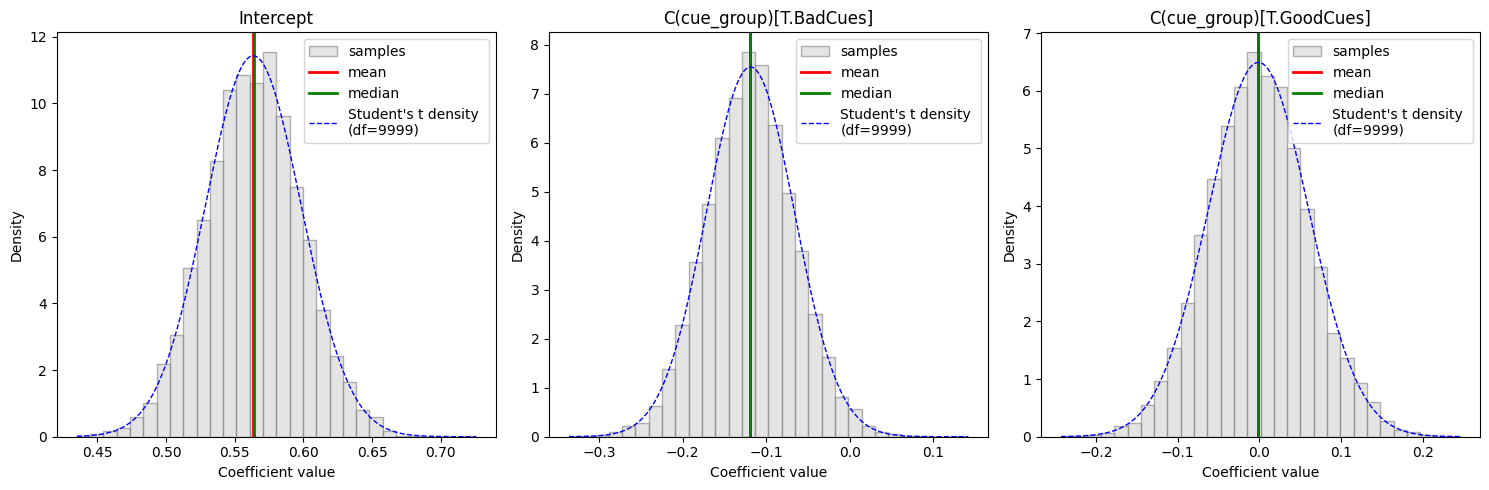

                              mean        se  ci_lower  ci_upper     t_stat  \
Intercept                 0.563431  0.034894  0.495033  0.631830  16.147111   
C(cue_group)[T.BadCues]  -0.118810  0.052853 -0.222414 -0.015207  -2.247919   
C(cue_group)[T.GoodCues] -0.001198  0.061445 -0.121642  0.119246  -0.019497   

                           p_value  
Intercept                 0.000000  
C(cue_group)[T.BadCues]   0.024603  
C(cue_group)[T.GoodCues]  0.984445  


In [17]:
from utils import bootstrap

formula = "score ~ C(cue_group)"
results_df, stats_df =  bootstrap(df_g, formula, n=10000, alpha=0.05)
print(stats_df)
